In [7]:
import numpy as np
import glob
import matplotlib.pyplot as plt
import skimage.io
import skimage.color
import skimage.filters
import cv2


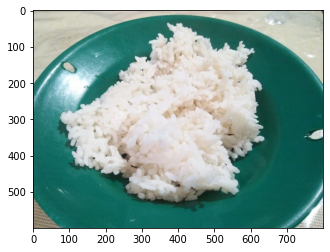

In [8]:
# load the image
image = skimage.io.imread("nasi.jpg")

fig, ax = plt.subplots()
plt.imshow(image)
plt.show()

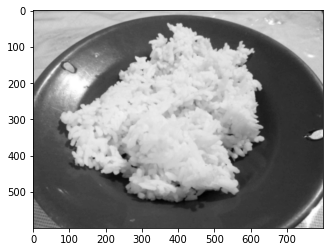

In [9]:
# convert the image to grayscale
gray_image = skimage.color.rgb2gray(image)

# blur the image to denoise
blurred_image = skimage.filters.gaussian(gray_image, sigma=1.0)

fig, ax = plt.subplots()
plt.imshow(blurred_image, cmap="gray")
plt.show()

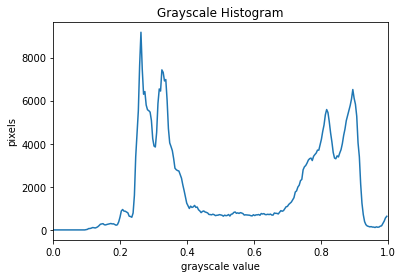

In [10]:
# create a histogram of the blurred grayscale image
histogram, bin_edges = np.histogram(blurred_image, bins=256, range=(0.0, 1.0))

fig, ax = plt.subplots()
plt.plot(bin_edges[0:-1], histogram)
plt.title("Grayscale Histogram")
plt.xlabel("grayscale value")
plt.ylabel("pixels")
plt.xlim(0, 1.0)
plt.show()

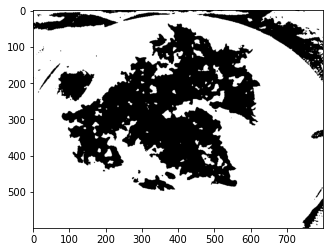

In [11]:
# create a mask based on the threshold
t = 0.8
binary_mask = blurred_image < t

fig, ax = plt.subplots()
plt.imshow(binary_mask, cmap="gray")
plt.show()

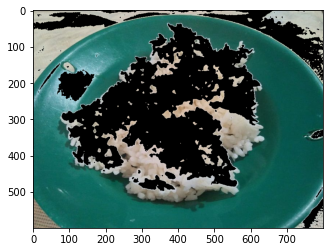

In [12]:
# use the binary_mask to select the "interesting" part of the image
selection = image.copy()
selection[~binary_mask] = 0

fig, ax = plt.subplots()
plt.imshow(selection)
plt.show()

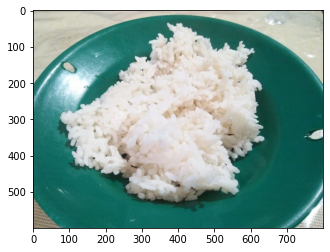

In [13]:
fig, ax = plt.subplots()
plt.imshow(image)
plt.show()

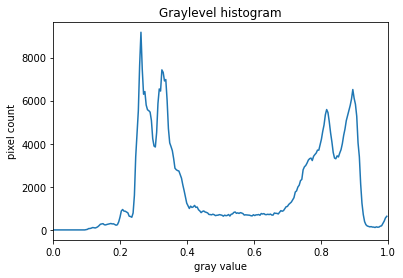

In [14]:
# convert the image to grayscale
gray_image = skimage.color.rgb2gray(image)

# blur the image to denoise
blurred_image = skimage.filters.gaussian(gray_image, sigma=1.0)

# show the histogram of the blurred image
histogram, bin_edges = np.histogram(blurred_image, bins=256, range=(0.0, 1.0))
fig, ax = plt.subplots()
plt.plot(bin_edges[0:-1], histogram)
plt.title("Graylevel histogram")
plt.xlabel("gray value")
plt.ylabel("pixel count")
plt.xlim(0, 1.0)
plt.show()

In [15]:
# perform automatic thresholding
t = skimage.filters.threshold_otsu(blurred_image)
print("Found automatic threshold t = {}.".format(t))

Found automatic threshold t = 0.5711149183670479.


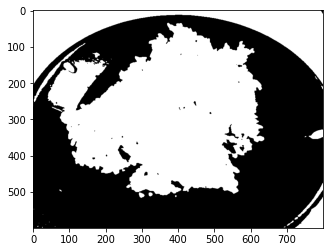

In [16]:
# create a binary mask with the threshold found by Otsu's method
binary_mask = blurred_image > t

fig, ax = plt.subplots()
plt.imshow(binary_mask, cmap="gray")
plt.show()

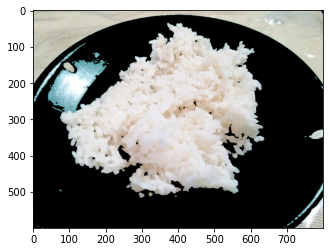

In [17]:
# apply the binary mask to select the foreground
selection = image.copy()
selection[~binary_mask] = 0

fig, ax = plt.subplots()
plt.imshow(selection)
plt.show()

In [22]:
def measure_root_mass(filename, sigma=1.0):

    # read the original image, converting to grayscale on the fly
    image = skimage.io.imread(fname=filename, as_gray=True)

    # blur before thresholding
    blurred_image = skimage.filters.gaussian(image, sigma=sigma)

    # perform automatic thresholding to produce a binary image
    t = skimage.filters.threshold_otsu(blurred_image)
    binary_mask = blurred_image > t

    # determine root mass ratio
    rootPixels = np.count_nonzero(binary_mask)
    w = binary_mask.shape[1]
    h = binary_mask.shape[0]
    density = rootPixels / (w * h)
    area=round((w*h)/78)

    return binary_mask

In [23]:
measure_root_mass(filename="nasi.jpg", sigma=1.5)

array([[ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       ...,
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True]])

# Best Example

6154
142.0
[[255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 ...
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]]


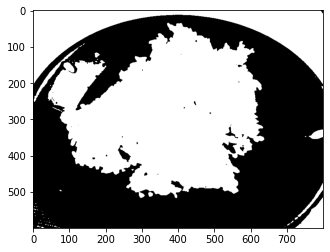

In [21]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('nasi.jpg',0)
# Otsu's thresholding after Gaussian filtering
blur = cv.GaussianBlur(img,(5,5),0)
ret3,th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

binary_mask = th3 > 0.8

rootPixels = np.count_nonzero(binary_mask)
w = binary_mask.shape[1]
h = binary_mask.shape[0]
area=round((w*h)/78)
print(area)
print(ret3)
print(th3)

fig, ax = plt.subplots()
plt.imshow(th3, cmap="gray")
plt.show()

In [18]:
import numpy as np
import glob
import matplotlib.pyplot as plt
import skimage.io
import skimage.color
import skimage.filters
from skimage import data, filters, measure, morphology
import cv2 as cv

class KaloriMeter:
    def segment(image_path):
        image = cv.imread(image_path, 0)

        blurred_image = cv.GaussianBlur(image, (5,5), 0)
        t = filters.threshold_otsu(blurred_image)
        binary_mask = blurred_image > t
        binary_mask = morphology.remove_small_objects(binary_mask, 50)
        binary_mask = morphology.remove_small_holes(binary_mask, 50)
        labels = measure.label(binary_mask)
        for region in measure.regionprops(labels, image):
            area = region.area
            area = area / 78
            print(round(area))


        return [binary_mask, area]

    def calories(self, binary_mask):
        w = binary_mask.shape[1]
        h = binary_mask.shape[0]
        area=round((w*h)/78)
        return area

700
2297
18
2
9
10
2
39


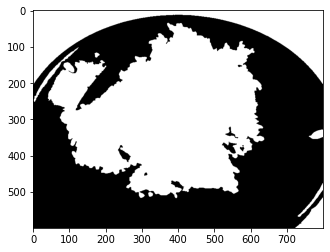

In [21]:
kalorimeter = KaloriMeter
a=kalorimeter.segment('nasi.jpg')
fig, ax = plt.subplots()
plt.imshow(a[0], cmap="gray")
plt.show()

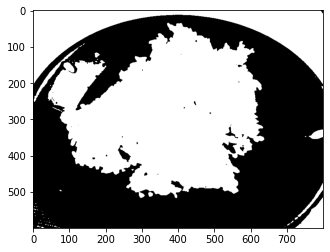

[[ True  True  True ... False False False]
 [ True  True  True ... False False False]
 [ True  True  True ... False False False]
 ...
 [False False False ...  True  True  True]
 [False False False ...  True  True  True]
 [False False False ...  True  True  True]]


In [49]:
from skimage.measure import find_contours
from skimage.io import imread
import matplotlib.pyplot as plt
from skimage.color import rgb2gray

kaloriMeter = KaloriMeter()
segment = kaloriMeter.segment('nasi.jpg')
calories = kaloriMeter.calories(segment)

contours = find_contours(calories, 0.8)

# cnts = cv.findContours(segment, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
# cnts = cnts[0] if len(cnts) == 2 else cnts[1]
# for c in cnts:
#     x,y,w,h = cv.boundingRect(c)
#     cv.rectangle(image, (x, y), (x + w, y + h), (0,0,255), 2)

fig, ax = plt.subplots()
plt.imshow(segment, cmap="gray")
plt.show()
print(segment)

In [55]:
import cv2
import numpy as np

image = cv2.imread('nasi.jpg')
original = image.copy()

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[0]

ROI_number = 0
cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# cnts = cnts[0] if len(cnts) == 2 else cnts[1]
# for c in cnts:
#     x,y,w,h = cv2.boundingRect(c)
#     cv2.rectangle(image, (x, y), (x + w, y + h), (0,0,255), 2)

# fig, ax = plt.subplots()
# plt.imshow(thresh, cmap="gray")
# plt.show()

print(cnts)

error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\contours.cpp:197: error: (-210:Unsupported format or combination of formats) [Start]FindContours supports only CV_8UC1 images when mode != CV_RETR_FLOODFILL otherwise supports CV_32SC1 images only in function 'cvStartFindContours_Impl'


In [60]:
"""
Annotate segmentation with text
===============================
Perform a segmentation and annotate the results with
bounding boxes and text
"""
import numpy as np
from skimage import data
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops_table
from skimage.morphology import closing, square, remove_small_objects
import napari


def segment(image):
    """Segment an image using an intensity threshold determined via
    Otsu's method.
    Parameters
    ----------
    image : np.ndarray
        The image to be segmented
    Returns
    -------
    label_image : np.ndarray
        The resulting image where each detected object labeled with a unique integer.
    """
    # apply threshold
    thresh = threshold_otsu(image)
    bw = closing(image > thresh, square(4))

    # remove artifacts connected to image border
    cleared = remove_small_objects(clear_border(bw), 20)

    # label image regions
    label_image = label(cleared)

    return label_image


def make_bbox(bbox_extents):
    """Get the coordinates of the corners of a
    bounding box from the extents
    Parameters
    ----------
    bbox_extents : list (4xN)
        List of the extents of the bounding boxes for each of the N regions.
        Should be ordered: [min_row, min_column, max_row, max_column]
    Returns
    -------
    bbox_rect : np.ndarray
        The corners of the bounding box. Can be input directly into a
        napari Shapes layer.
    """
    minr = bbox_extents[0]
    minc = bbox_extents[1]
    maxr = bbox_extents[2]
    maxc = bbox_extents[3]

    bbox_rect = np.array(
        [[minr, minc], [maxr, minc], [maxr, maxc], [minr, maxc]]
    )
    bbox_rect = np.moveaxis(bbox_rect, 2, 0)

    return bbox_rect


def circularity(perimeter, area):
    """Calculate the circularity of the region
    Parameters
    ----------
    perimeter : float
        the perimeter of the region
    area : float
        the area of the region
    Returns
    -------
    circularity : float
        The circularity of the region as defined by 4*pi*area / perimeter^2
    """
    circularity = 4 * np.pi * area / (perimeter ** 2)

    return circularity


# load the image and segment it
image = data.coins()[50:-50, 50:-50]
label_image = segment(image)

# create the features dictionary
features = regionprops_table(
    label_image, properties=('label', 'bbox', 'perimeter', 'area')
)
features['circularity'] = circularity(
    features['perimeter'], features['area']
)

# create the bounding box rectangles
bbox_rects = make_bbox([features[f'bbox-{i}'] for i in range(4)])

# specify the display parameters for the text
text_parameters = {
    'string': 'label: {label}\ncirc: {circularity:.2f}',
    'size': 12,
    'color': 'green',
    'anchor': 'upper_left',
    'translation': [-3, 0],
}

# initialise viewer with coins image
viewer = napari.view_image(image, name='coins', rgb=False)

# add the labels
label_layer = viewer.add_labels(label_image, name='segmentation')

shapes_layer = viewer.add_shapes(
    bbox_rects,
    face_color='transparent',
    edge_color='green',
    features=features,
    text=text_parameters,
    name='bounding box',
)


napari.run()

ModuleNotFoundError: No module named 'PyQt5'

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image
import cv2
import plotly
import plotly.graph_objects as go
import plotly.express as px
from skimage import data, filters, measure, morphology
from skimage.draw import ellipse
from skimage.measure import label, regionprops, regionprops_table
from skimage.transform import rotate


def segment(path):
    image = cv2.imread(path, 0)
    thresholded_image = filters.threshold_otsu(image)
    mask = image > thresholded_image
    mask = morphology.remove_small_objects(mask, 50)
    mask = morphology.remove_small_holes(mask, 50)
    labels = label(mask)
    fig = px.imshow(image, binary_string=True)
    fig.update_traces(hoverinfo='skip')


    props = regionprops(labels, image)
    properties = ['area', 'eccentricity', 'perimeter', 'intensity_mean']

    for region in props:
        area = region.area
        area = area / 78
        # print(round(area))
    
    a=  mask.reshape((image.shape[0],image.shape[1]))
    return a.astype(np.uint8)

def kmeans(image):
        img=cv2.imread(image)
        image=cv2.GaussianBlur(img,(7,7),0)
        vectorized=image.reshape(-1,3)
        vectorized=np.float32(vectorized) 
        criteria=(cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
        ret,label,center=cv2.kmeans(vectorized,2,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
        res = center[label.flatten()]
        segmented_image = res.reshape((image.shape))
        props = regionprops(label)
        for region in props:
            area = region.area
            area = area / 78
            print(area)
        return label.reshape((image.shape[0],image.shape[1])),segmented_image.astype(np.uint8)


a,b=kmeans('nasi.jpg')
img=Image.fromarray(b)
img

# img  = Image.fromarray(a)
# Saving the image
# img

# a=labels.reshape((image.shape[0],image.shape[1]))
# b=mask.astype(np.uint8)
# im=Image.fromarray

# a=mask.astype(np.uint8)
# # a=np.reshape(a,(1024,720))
# im=Image.fromarray(a)
# im.save('filename.jpg')

error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\smooth.dispatch.cpp:617: error: (-215:Assertion failed) !_src.empty() in function 'cv::GaussianBlur'


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image
import cv2 as cv
import plotly
import plotly.graph_objects as go
import plotly.express as px
from skimage import data, filters, measure, morphology
from skimage.draw import ellipse, polygon_perimeter, set_color
from skimage.measure import label, regionprops, regionprops_table
from skimage.transform import rotate

def segment(image_path):
    image = cv.imread(image_path, 0)

    blurred_image = cv.GaussianBlur(image, (5,5), 0)
    t = filters.threshold_otsu(blurred_image)
    binary_mask = blurred_image > t
    binary_mask = morphology.remove_small_objects(binary_mask, 50)
    binary_mask = morphology.remove_small_holes(binary_mask, 50)

    # calculate perimeter of object (cocok)
    perimeter = measure.perimeter(binary_mask, 4) * 0.026458333

    # calculate area of object
    labels = measure.label(binary_mask)
        
    areas = []
    for region in measure.regionprops(np.squeeze(labels), image):
        area = region.area
        area = area * 0.026458333
        # print(area)

    # create bounding box
    bounding_box = []
    for region in measure.regionprops(np.squeeze(labels), image):
        bbox = region.bbox
        print(region)
        bounding_box.append(bbox)
    print(bounding_box)

    with_boxes = np.copy(binary_mask)

    height = []
    for box in bounding_box:
        #[Xmin, Xmax, Ymin, Ymax]
        r = [box[2],box[0],box[0],box[2]]
        c = [box[3],box[3],box[1],box[1]]
        rr, cc = polygon_perimeter(r, c, binary_mask.shape)
        with_boxes[rr, cc] = 1 #set color white
        
        # calculate height
        rmax = box[2]
        rmin = box[0]
        height.append([(rmax-rmin) * 0.026458333])

    

    # return perimeter, area, binary_mask, labels, h, with_boxes
    return area, np.max(height), with_boxes

area, height, with_boxes = segment('height.jpg')
# print('perimeter: ', perimeter)
print('area: ', area)
print('high: ', height)
fig, ax = plt.subplots()
plt.imshow(with_boxes, cmap="gray")
ax.invert_yaxis()
plt.show()


ModuleNotFoundError: No module named 'pandas'

[(306, 468, 343, 662)]
high:  0.978958321
area:  388.276036775
volume:  380.1060570457883


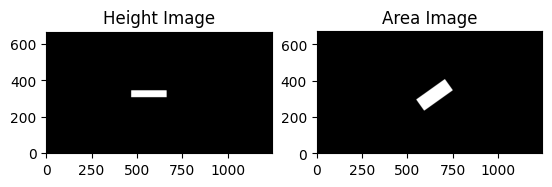

In [2]:
import numpy as np
import glob
import matplotlib.pyplot as plt
import skimage.io
import skimage.color
import skimage.filters
from skimage.draw import polygon_perimeter
from skimage.measure import label, regionprops, perimeter
from skimage import filters, measure, morphology
import cv2 as cv

def segment(height_image_path, area_image_path):
        # calculate height of object
        height_image = cv.imread(height_image_path, 0)
        blurred_height_image = cv.GaussianBlur(height_image, (5,5), 0)
        th = filters.threshold_otsu(blurred_height_image)
        binary_height_mask = blurred_height_image > th
        binary_height_mask = morphology.remove_small_objects(binary_height_mask, 50)
        binary_height_mask = morphology.remove_small_holes(binary_height_mask, 50)

        # create bounding box
        area_image_labels = label(binary_height_mask)
        bounding_box = []
        for region in regionprops(np.squeeze(area_image_labels), height_image):
            bbox = region.bbox
            print(region)
            bounding_box.append(bbox)
        print(bounding_box)

        with_boxes = np.copy(binary_height_mask)

        height = []
        for box in bounding_box:
            #[Xmin, Xmax, Ymin, Ymax]
            r = [box[2],box[0],box[0],box[2]]
            c = [box[3],box[3],box[1],box[1]]
            rr, cc = polygon_perimeter(r, c, binary_height_mask.shape)
            with_boxes[rr, cc] = 1 #set color white
            
            # calculate height
            rmax = box[2]
            rmin = box[0]
            height.append([(rmax-rmin) * 0.026458333])




        # calculate area of object
        area_image = cv.imread(area_image_path, 0)
        blurred_area_image = cv.GaussianBlur(area_image, (5,5), 0)
        ta = filters.threshold_otsu(blurred_area_image)
        binary_area_mask = blurred_area_image > ta
        binary_area_mask = morphology.remove_small_objects(binary_area_mask, 50)
        binary_area_mask = morphology.remove_small_holes(binary_area_mask, 50)

        height_image_labels = label(binary_area_mask)
            
        areas = []
        for region in regionprops(height_image_labels, area_image):
            area = region.area
            area = area * 0.026458333
            # print(area)

        # calculate perimeter of object
        # perimeter = perimeter(binary_mask, 4) * 0.026458333
        height = np.max(height)
        volume = area * height
        return area, height, volume, binary_area_mask, with_boxes

area, height, volume, binary_area_mask, with_boxes = segment('height.jpg', 'area.jpg')
print('high: ', height)
print('area: ', area)
print('volume: ', volume)

figure, axis = plt.subplots(1, 2)
  
# For height image
axis[0].imshow(with_boxes, cmap="gray")
axis[0].set_title("Height Image")
axis[0].invert_yaxis()
  
# For area image
axis[1].imshow(binary_area_mask, cmap="gray")
axis[1].set_title("Area Image")
axis[1].invert_yaxis()

plt.show()